In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [22]:
from collections import defaultdict
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

from bgspy.theory import bgs_rec, bgs_segment, bgs_segment_sc16, bgs_segment_sc16_manual_vec
from bgspy.classic import bgs_segment_from_parts_sc16
from bgspy.parallel import MapPosChunkIterator
from bgspy.genome import Genome

In [3]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

In [4]:
bgs_segment_sc16(1e-8, 1e-5, 1000, 1e-4, 1000, full_output=True)

(array([101006.70011404,    999.99998052]),
 array({'nfev': 5, 'fjac': array([[-1.00000000e+00, -3.87475983e-06],
        [ 3.87475983e-06, -1.00000000e+00]]), 'r': array([ 9.90033216e-06, -1.00292839e-05,  1.00000008e-03]), 'qtf': array([-1.77636028e-15, -8.88171537e-16]), 'fvec': array([1.77635684e-15, 8.88178420e-16])},
       dtype=object),
 array(1),
 array('The solution converged.', dtype='<U23'))

In [5]:
mu = np.logspace(-9, -7, 3)[:, None, None]
sh = np.logspace(-5, -1, 4)[None, :, None]

sc16 = bgs_segment_sc16(mu, sh, [1000, 1000, 1000], [1e-8, 1e-8, 1e-8], 1000)

In [6]:
sc16.shape

(3, 4, 3)

## Testing Vectorization

In [7]:
mu = np.logspace(-9, -7, 10)[:, None, None]
sh = np.logspace(-5, -1, 11)[None, :, None]

n = 1000
L = np.random.randint(1, 100, n)
rbp = np.random.uniform(1e-9, 1e-7, n)
            

vec = np.prod(bgs_segment_sc16(mu, sh, L, rbp, 1000), axis=2)
manual = np.prod(bgs_segment_sc16_manual_vec(mu, sh, L, rbp, 1000), axis=2)
np.allclose(vec, manual)

/home/vsb/miniconda3/envs/bprime/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


True

In [29]:
parts[0].shape

(100,)

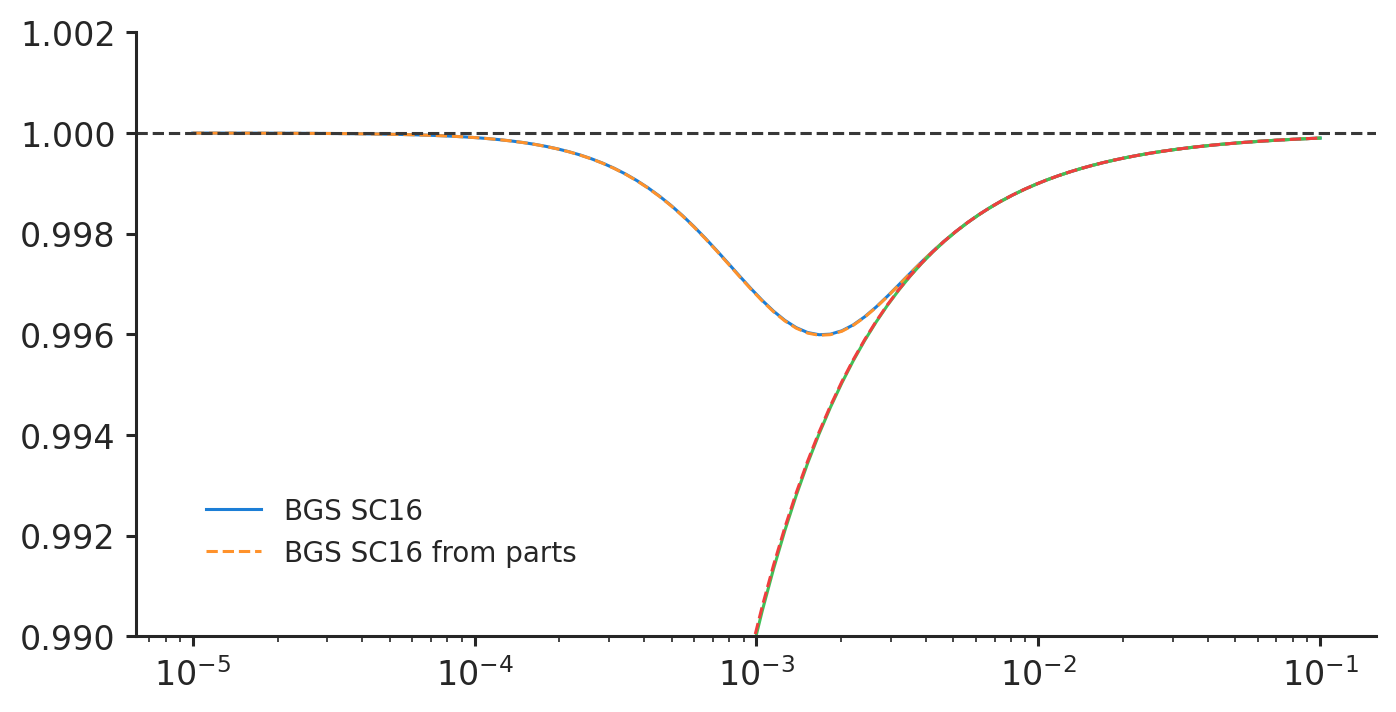

In [36]:
mu = 1e-8
rf = 1e-8
rf = 1e-8
sh = np.logspace(-5, -1, 100)
L = 1000
N = 1000


plt.plot(sh, bgs_segment_sc16(mu, sh, L, rf, N)/N, label=f"BGS SC16")

parts = bgs_segment_sc16(mu, sh, L, rf, N, return_both=True)

plt.plot(sh,  bgs_segment_from_parts_sc16(parts, rf, log=False), linestyle='dashed',  label=f"BGS SC16 from parts")

plt.plot(sh, bgs_rec(mu, sh, L, rf))
plt.plot(sh, bgs_segment(mu, sh, L, 1e-8, rf), linestyle='dashed')

plt.semilogx()
plt.axhline(1, linestyle='dashed', c='0.22')
#plt.ylim(np.nanmin(sc16)*0.999, 1.0002)
plt.ylim(0.990, 1.002)
plt.legend()